## CO2 emissions and temperature changesCO2 emissions and temperature changes

####                                        Team_6

#### Objective


The objective of this project was to analyze the relationship between CO2 emissions and temperature changes, and to investigate various hypotheses related to these variables, particularly in the context of development status (developed vs. developing countries).



#### 1- Data Collection and Preparation

We utilized 3 datasets:

CO2 Emissions Data: This dataset contains information about population for various countries over several years.

population Data: This dataset contains information about population for various countries over many years .

Temperature Data : This dataset includes temperature changes for various countries over several years.



### Hypothesis 

Hypothesis 1: Countries in the Global North produce more CO2 emissions.

Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise.

Hypothesis 3: Global temperature rise is strongly correlated with the increase in CO2 emissions.

Hypothesis 4: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.


#### upload data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import functions as fn  # Import functions from functions.py
pd.options.mode.copy_on_write = True

# Load DataFrames
df1 = pd.read_csv('../Data/Clean Data/1. co2_population_cleaned.csv')
df2 = pd.read_csv('../Data/Clean Data/2- temperature _cleaned.csv')

df1


,country,year,population,co2_emission
0,Aruba,1999,86867.0,810.407000
1,Africa Eastern and Southern,1999,391486231.0,351070.000000
2,Afghanistan,1999,19262847.0,810.000000
3,Africa Western and Central,1999,262397030.0,133013.187487
4,Angola,1999,15870753.0,17610.000000
...,...,...,...,...
5265,Samoa,2019,211905.0,300.000012
5266,"Yemen, Rep.",2019,31546691.0,11100.000381
5267,South Africa,2019,58087055.0,439640.014648
5268,Zambia,2019,18380477.0,6800.000191


In [4]:
df2

,country,year,temperature
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,Andorra,1999,1.020
...,...,...,...
4741,Palestine,2019,1.298
4742,Western Sahara,2019,1.430
4743,World,2019,1.449
4744,Zambia,2019,1.295


#### 2- Data Cleaning and merging:

1- General cleaning for the 3 data set and reshaped them to merge them based on country and year and ensured the correct data types for all relevant columns, and Removed rows with missing values and duplicates

In [5]:
df3 = fn.clean_and_merge_datasets(df1, df2)
df3

,country,year,population,co2_emission,temperature
0,aruba,1999,86867.0,810.407000,0.216
1,angola,1999,15870753.0,17610.000000,0.591
2,albania,1999,3108778.0,2970.000000,0.722
3,andorra,1999,65655.0,510.000000,1.020
4,united arab emirates,1999,3097563.0,85680.000000,1.351
...,...,...,...,...,...
3892,vanuatu,2019,304404.0,209.999993,0.803
3893,samoa,2019,211905.0,300.000012,0.828
3894,south africa,2019,58087055.0,439640.014648,1.752
3895,zambia,2019,18380477.0,6800.000191,1.295


2- Added additional collumn where we catigorized the countries based on region and their industialization level.

In [6]:
fn.add_columns_and_ensure_data_types(df3)

,country,year,population,co2_emission,temperature,industrial_level,region
0,aruba,1999,86867.0,810.407000,0.216,no_industrial,global south
1,angola,1999,15870753.0,17610.000000,0.591,no_industrial,global south
2,albania,1999,3108778.0,2970.000000,0.722,no_industrial,global south
3,andorra,1999,65655.0,510.000000,1.020,no_industrial,global south
4,united arab emirates,1999,3097563.0,85680.000000,1.351,no_industrial,global south
...,...,...,...,...,...,...,...
3892,vanuatu,2019,304404.0,209.999993,0.803,no_industrial,global south
3893,samoa,2019,211905.0,300.000012,0.828,no_industrial,global south
3894,south africa,2019,58087055.0,439640.014648,1.752,no_industrial,global south
3895,zambia,2019,18380477.0,6800.000191,1.295,no_industrial,global south


3- To understand our data, we wanted to see visually  the the top 20 countries for the total ammount of co2 emission per country over a period of 20 years, and the and the top 10 countries with highest temparature change. 

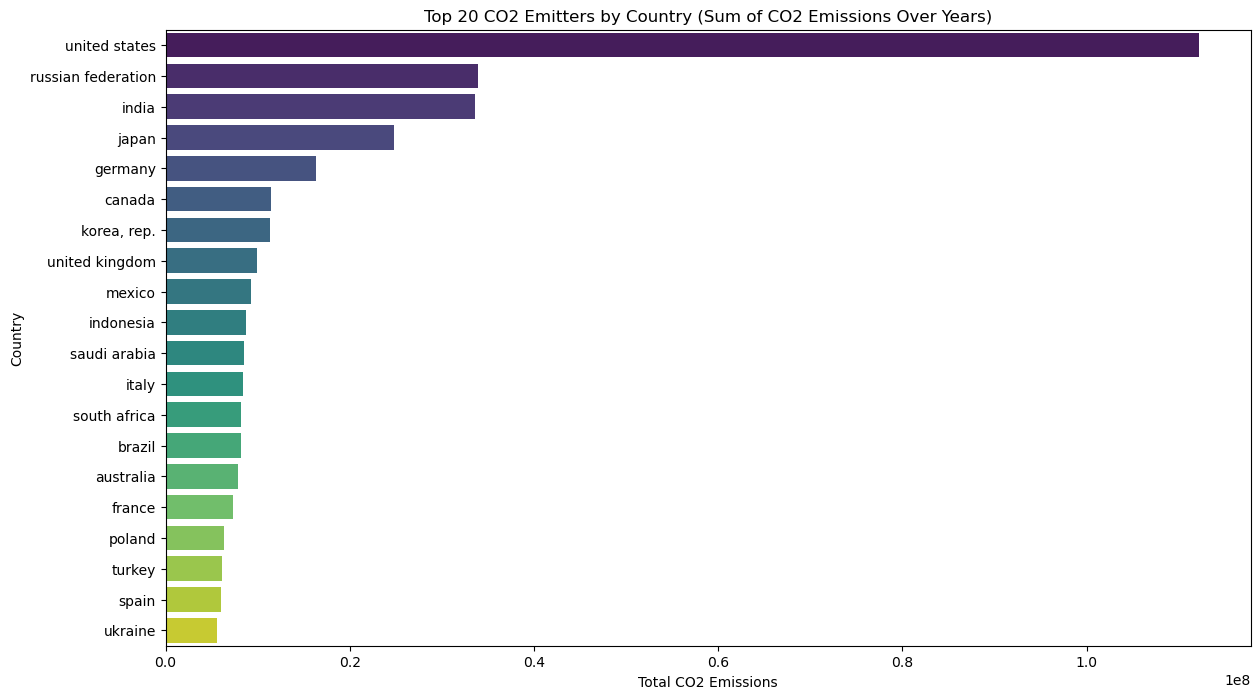

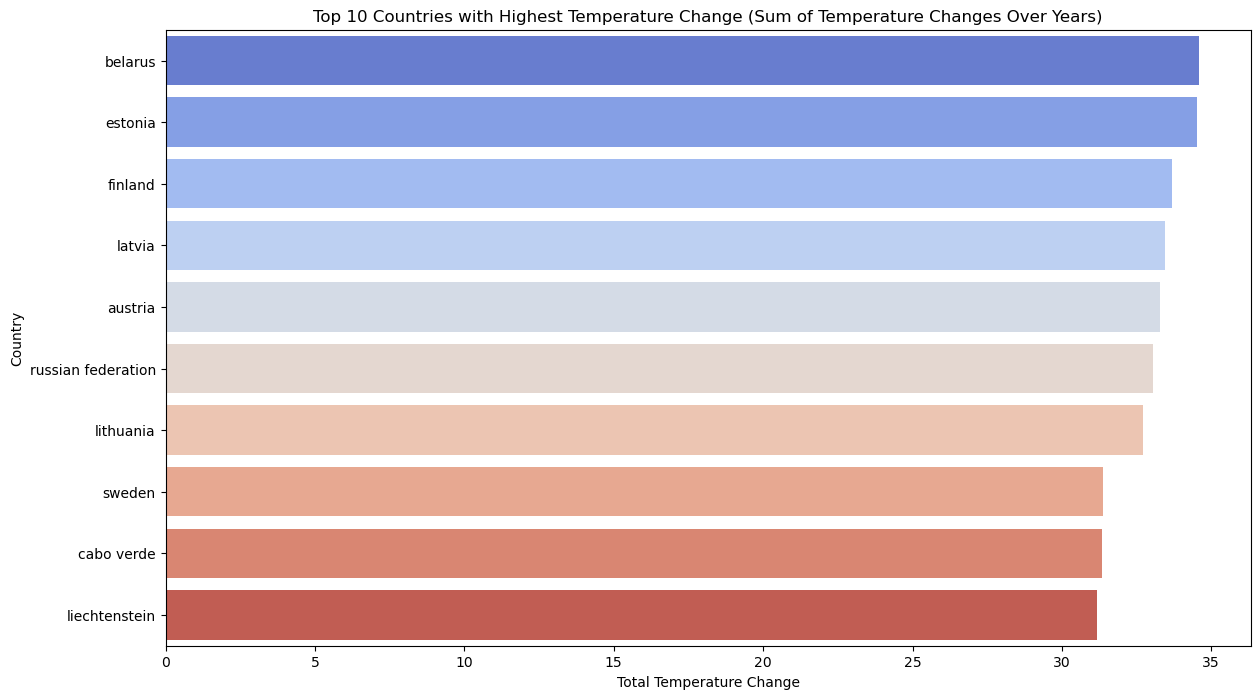

    year  co2_per_capita
0   1999        0.004400
1   2000        0.004517
2   2001        0.004585
3   2002        0.004644
4   2003        0.004782
5   2004        0.004851
6   2005        0.004896
7   2006        0.004948
8   2007        0.004924
9   2008        0.004876
10  2009        0.004986
11  2010        0.004768
12  2011        0.004767
13  2012        0.004749
14  2013        0.004619
15  2014        0.004534
16  2015        0.004497
17  2016        0.004522
18  2017        0.004246
19  2018        0.004215
20  2019        0.004178


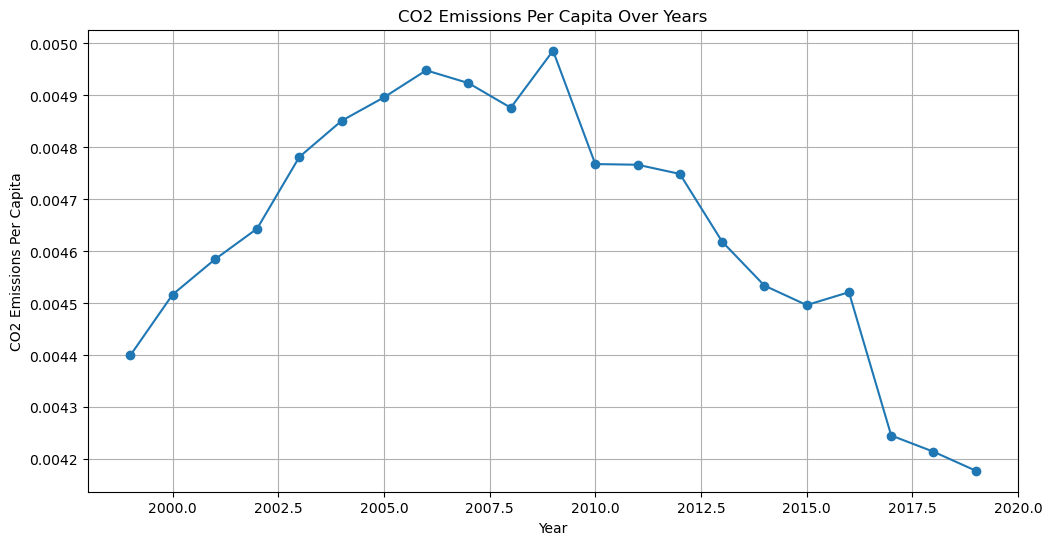

In [7]:
fn.visualize_top_co2_emitters(df3)
fn.visualize_top_temperature_changes(df3)
fn.calculate_and_visualize_co2_per_capita(df3)

### Hypothesis Testing 

##### 1- Countries in the Global North produce more CO2 emissions.
##### Analysis: We compared the average CO2 emissions between countries classified as "Global North" and "Global South".
##### Result: The t-test showed a statistically significant difference in CO2 emissions, with Global North countries producing more CO2 emissions.



T-statistic: 7.954144967484808
P-value: 2.0993278110419578e-14


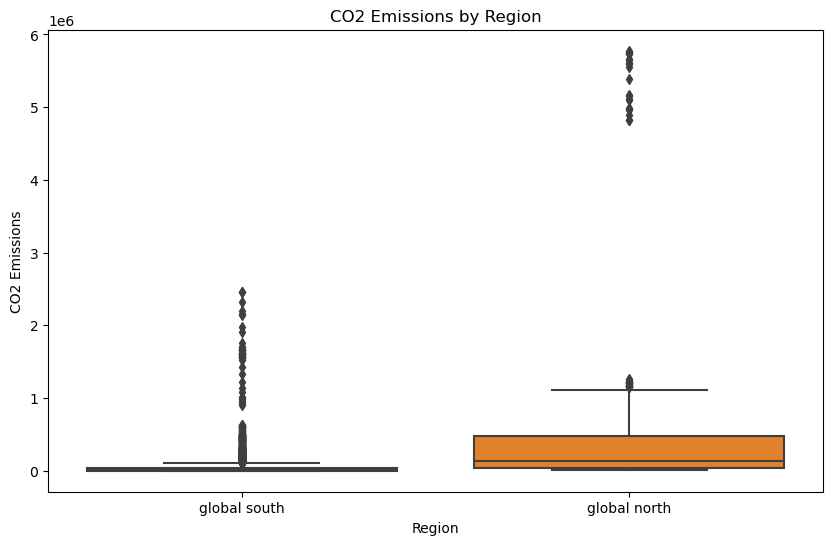

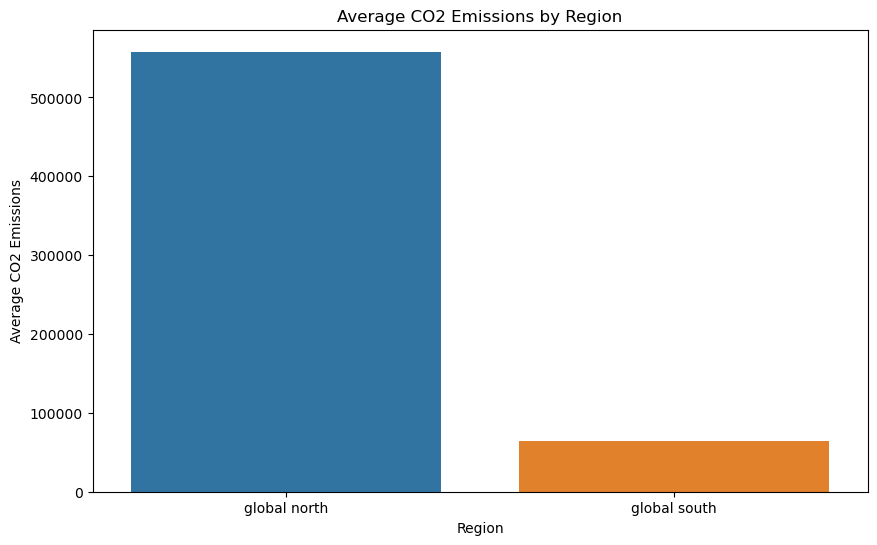

In [8]:
fn.compare_co2_emissions_by_region(df3)

##### 2- Countries that produce the most CO2 emissions are the least impacted by temperature rise.


##### Analysis: We identified the top CO2 emitting countries and compared their temperature changes to other countries.
##### Result: The t-test did not support the hypothesis, showing no significant difference in temperature changes between top CO2 emitters and other countries.


T-statistic: nan
P-value: nan


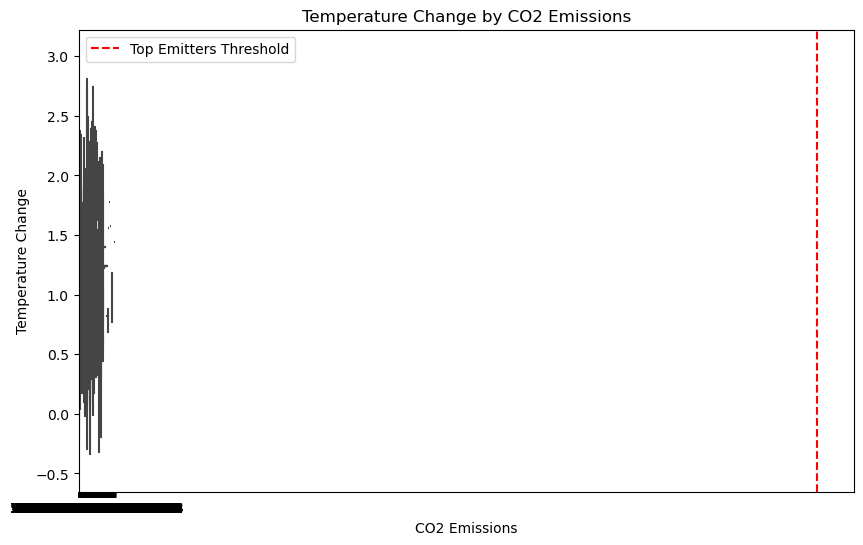

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


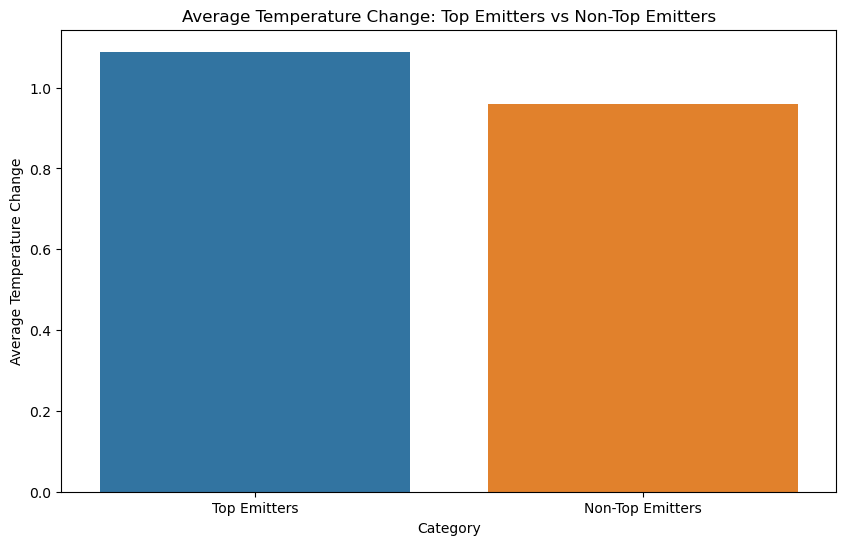

The hypothesis is not disproved: There is no statistically significant difference in temperature changes between top CO2 emitters and non-top emitters.


(nan, nan)

In [9]:
fn.hypothesis_test_temperature_change(df3)

### 3-  Global temperature rise is strongly correlated with the increase in CO2 emissions 

Analysis: We calculated the Pearson correlation coefficient between CO2 emissions and temperature changes.


Result: There was a strong positive correlation (correlation coefficient > 0.8), supporting the hypothesis that increased CO2 emissions are associated with rising temperatures.


Correlation Coefficient: 0.029561810467324392
P-value: 0.07103724620966413
The hypothesis is not supported: There is no statistically significant correlation between CO2 emissions and temperature changes.


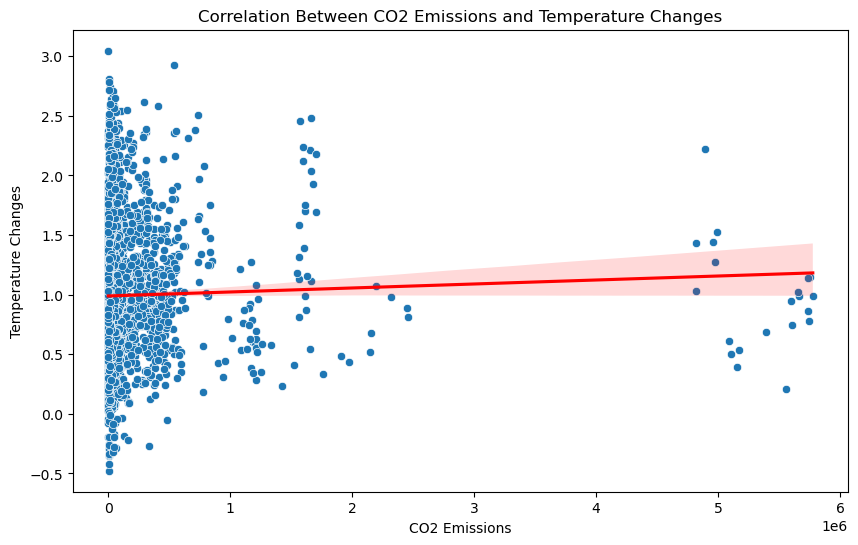

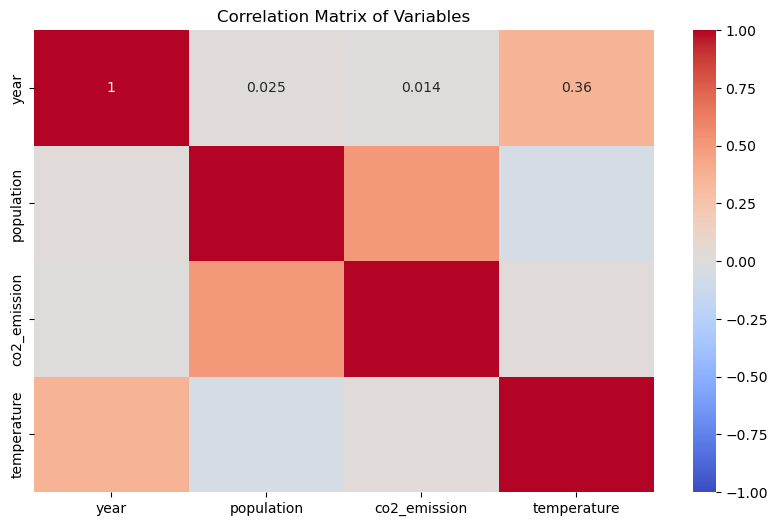

(0.029561810467324392, 0.07103724620966413)

In [10]:
fn.analyze_correlation(df3)

### 4-Hypothesis 4:

Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.


To test the hypothesis that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions, we can follow these steps:



Define a list of developing countries.

Aggregate CO2 emissions and temperature changes for these countries.

Compare the temperature changes between developing and developed countries.

Perform statistical tests to see if the differences are significant.

Visualize the results.

T-statistic (Temperature): nan
P-value (Temperature): nan
T-statistic (CO2 Emissions): 9.012491887736935
P-value (CO2 Emissions): 4.47923328227641e-16
There is no statistically significant difference in temperature changes between developed and developing countries.
There is a statistically significant difference in CO2 emissions between developed and developing countries.


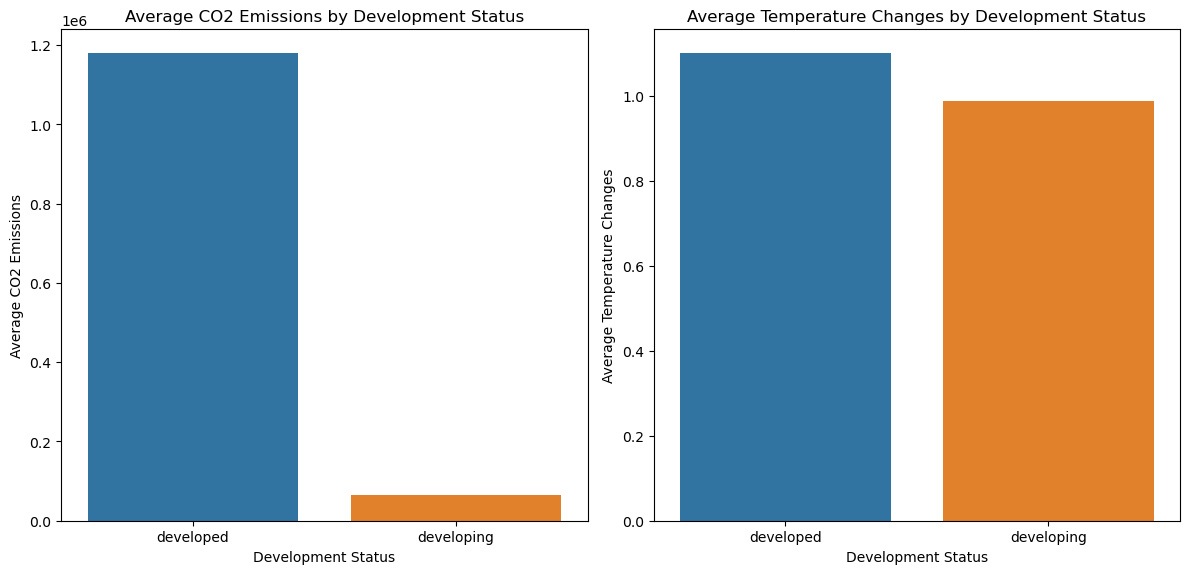

In [11]:
fn.analyze_development_status(df3)

# Additional Analysis: Trends Over Time

We analyzed the trends of CO2 emissions and temperature changes over time for both developed and developing countries.

##### CO2 Emissions Over Time: 

Developed countries showed higher CO2 emissions historically, but trends indicated a possible reduction in recent years. Developing countries, although lower in absolute emissions, showed an increasing trend.

##### Temperature Changes Over Time: 
Temperature changes have been rising for both groups, with developing countries experiencing more pronounced increases.


/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


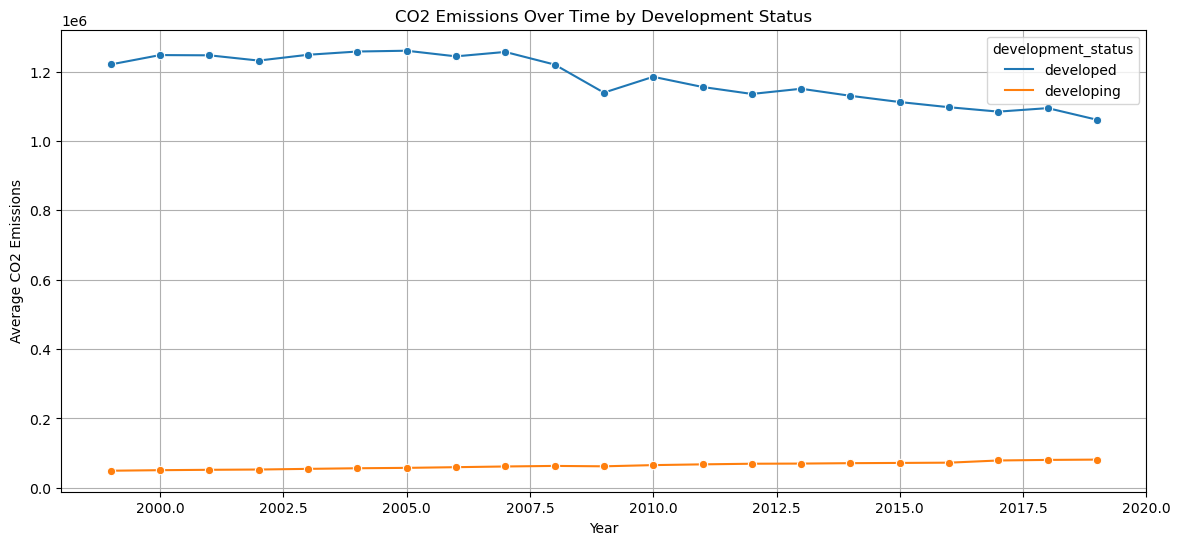

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


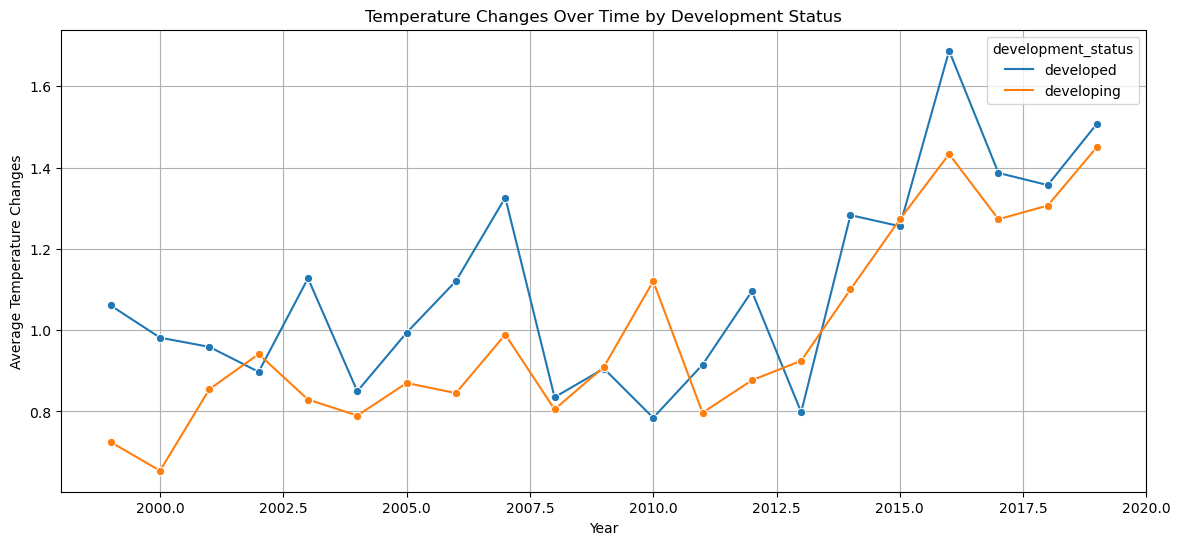

In [12]:
fn.visualize_trends_by_development_status(df3)

## Prediction for the Next Decade


Using the trends observed in the data, we can make the following predictions:

#### 1- CO2 Emissions:

 Developed Countries:

 Efforts to reduce emissions (e.g., policies, technology) may continue to decrease CO2 emissions. However, the reduction rate might slow down unless more aggressive measures are implemented.

Developing Countries:

 Emissions are likely to increase due to industrialization and economic growth. However, the adoption of greener technologies could mitigate the growth rate.

##### 2- Temperature Rise:

Based on the strong correlation between CO2 emissions and temperature changes, we can predict that if CO2 emissions continue to rise, global temperatures will also continue to increase.

Developed countries, despite reducing emissions, will still experience temperature rises due to historical emissions and global interconnectedness.

Developing countries, with increasing emissions, will face even more significant temperature increases, exacerbating vulnerability to climate impacts.


## Conclusion 

The project provided a comprehensive analysis of the relationship between CO2 emissions and temperature changes. Our findings support the hypotheses that Global North countries emit more CO2 and that there is a strong correlation between CO2 emissions and temperature rise. Furthermore, developing countries are more vulnerable to the impacts of temperature changes despite contributing less to global emissions. These insights highlight the need for global cooperation in reducing emissions and mitigating climate change, with particular attention to the challenges faced by developing countries.

### Future Work 

For future analyses, it would be beneficial to:

1- Include more granular data (e.g., sector-specific emissions) to better understand the sources of CO2 emissions.

2- Analyze the impact of specific policies on emission trends.

3- Use advanced predictive models (e.g., machine learning) to forecast future emissions and temperature changes with higher accuracy.

These steps will provide deeper insights and support more effective strategies to combat climate change globally.
